# Introduction to clustering

Clustering gives you a birds-eye view of the data in the collections. Instead of finding individual objects through search, you can instead find aggregated counts of objects that match your query, counted
under the authority that has matched, for example the materials, the technnique, the maker, the place etc. This lets you get a sense of the numbers of matches, and can be useful for data visualisations,
it also lets you build "generous interfaces" giving a sense of composition of results...

Clustering can be carried out in full or, if you already know that type of cluster you are interested in (e.g. wanting to find what materials where most in use in Venice in the 19th century), you can pass the 
cluster_type paramter to reduce the results down. The available cluster types are:
    
    * Materials - use cluster_type=materials
    * Technniques - use cluster_type=techniques
    * Places
    * Maker
    * Depicts
    * 
    
In addition you can use all of the normal parameters available in search, this lets you carry out a search (with filtering, restrictions, etc) but instead of getting a list of objects to page through,
you can see in one response the counts in total.

In [29]:
import requests
from IPython.display import display

def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

def treemap(clusters, cluster_name):
    
  clusters_json = [{"id": index+1, "name": "%s (%s)" % (x["value"], x["count"]), "parent": '0', "value": x["count"]} for index, x in enumerate(clusters)]
  clusters_json.insert(0, {"id": 0, "value": 0, "name": cluster_name})
    
  Vega({
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "An example of treemap layout for hierarchical data.",
  "width": 1200,
  "height": 800,
  "padding": 2.5,
  "autosize": "none",
  "data": [
    {
      "name": "tree",
      "values": clusters_json,
      "transform": [
        {
          "type": "stratify",
          "key": "id",
          "parentKey": "parent"
        },
        {
          "type": "treemap",
          "field": "value",
          "sort": {"field": "value", "order": "descending"},
          "round": True,
          "size": [{"signal": "width"}, {"signal": "height"}]
        }
      ]
    },
    {
      "name": "nodes",
      "source": "tree",
      "transform": [{ "type": "filter", "expr": "datum.children" }]
    },
    {
      "name": "leaves",
      "source": "tree",
      "transform": [{ "type": "filter", "expr": "datum.parent == 0" }]
    }
  ],

  "scales": [
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "nodes", "field": "name"},
      "range": [
        "#3182bd", "#6baed6", "#9ecae1", "#c6dbef", "#e6550d",
        "#fd8d3c", "#fdae6b", "#fdd0a2", "#31a354", "#74c476",
        "#a1d99b", "#c7e9c0", "#756bb1", "#9e9ac8", "#bcbddc",
        "#dadaeb", "#636363", "#969696", "#bdbdbd", "#d9d9d9"
      ]
    },
    {
      "name": "size",
      "type": "ordinal",
      "domain": [0, 1, 2, 3],
      "range": [256, 10, 20, 14]
    },
    {
      "name": "opacity",
      "type": "ordinal",
      "domain": [0, 1, 2, 3],
      "range": [0.15, 0.5, 0.8, 1.0]
    }
  ],

  "marks": [
    {
      "type": "rect",
      "from": {"data": "nodes"},
      "interactive": False,
      "encode": {
        "enter": {
          "fill": {"scale": "color", "field": "name"}
        },
        "update": {
          "x": {"field": "x0"},
          "y": {"field": "y0"},
          "x2": {"field": "x1"},
          "y2": {"field": "y1"}
        }
      }
    },
    {
      "type": "rect",
      "from": {"data": "leaves"},
      "encode": {
        "enter": {
          "stroke": {"value": "#fff"}
        },
        "update": {
          "x": {"field": "x0"},
          "y": {"field": "y0"},
          "x2": {"field": "x1"},
          "y2": {"field": "y1"},
          "fill": {"value": "transparent"},
          "href": {"value": "https://collections.vam.ac.uk/"}
        },
        "hover": {
          "fill": {"value": "green"}
        }
      }
    },
    {
      "type": "text",
      "from": {"data": "leaves"},
      "interactive": False,
      "encode": {
        "enter": {
          "font": {"value": "Helvetica Neue, Arial"},
          "align": {"value": "center"},
          "baseline": {"value": "middle"},
          "fill": {"value": "#000"},
          "text": {"field": "name"},
          "fontSize": {"scale": "size", "field": "depth"},
          "fillOpacity": {"scale": "opacity", "field": "depth"}
        },
        "update": {
          "x": {"signal": "0.5 * (datum.x0 + datum.x1)"},
          "y": {"signal": "0.5 * (datum.y0 + datum.y1)"}
        }
      }
    }
  ]
}
)

# Cluster materials

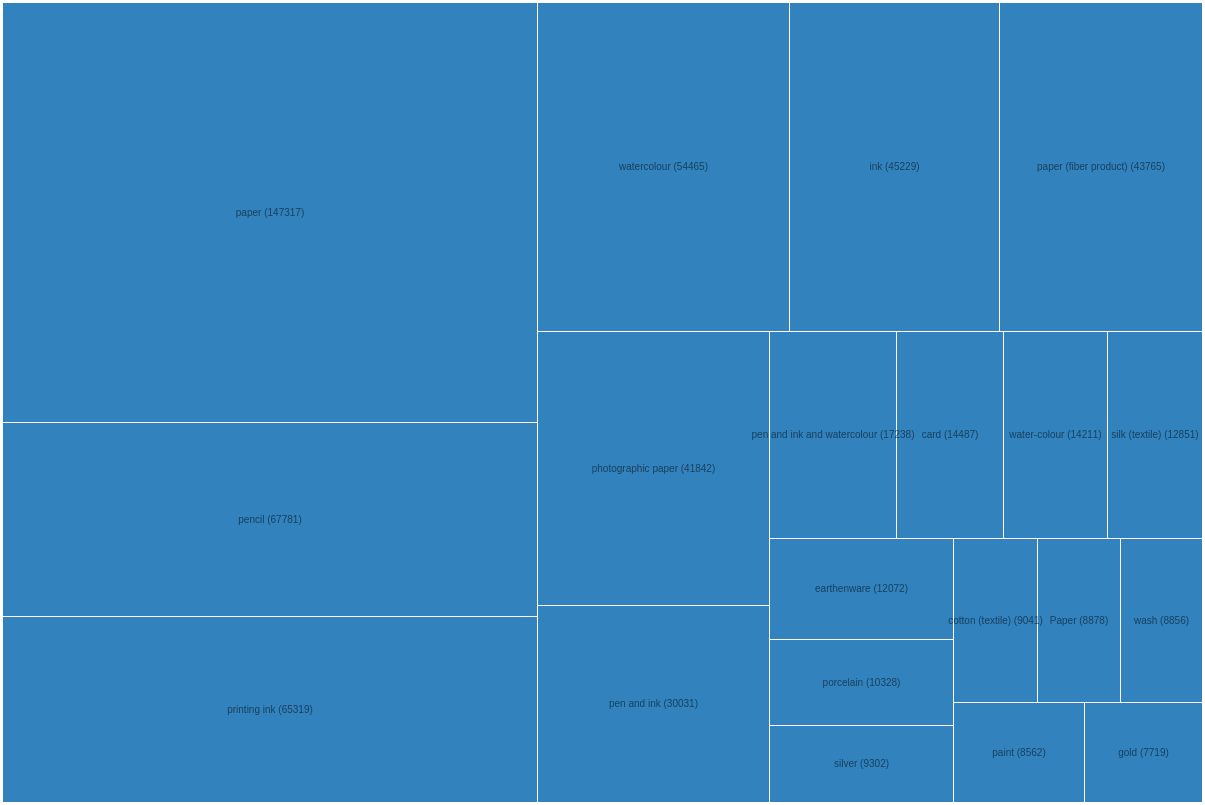

In [28]:
req = requests.get('http://vam-etc-test-api.azureedge.net/api/v2/objects/clusters/search?cluster_type=material')

object_data = req.json()
object_info = object_data["info"]
object_clusters = object_data["clusters"]
materials = object_clusters["materials"]["terms"]
treemap(materials, "Materials")

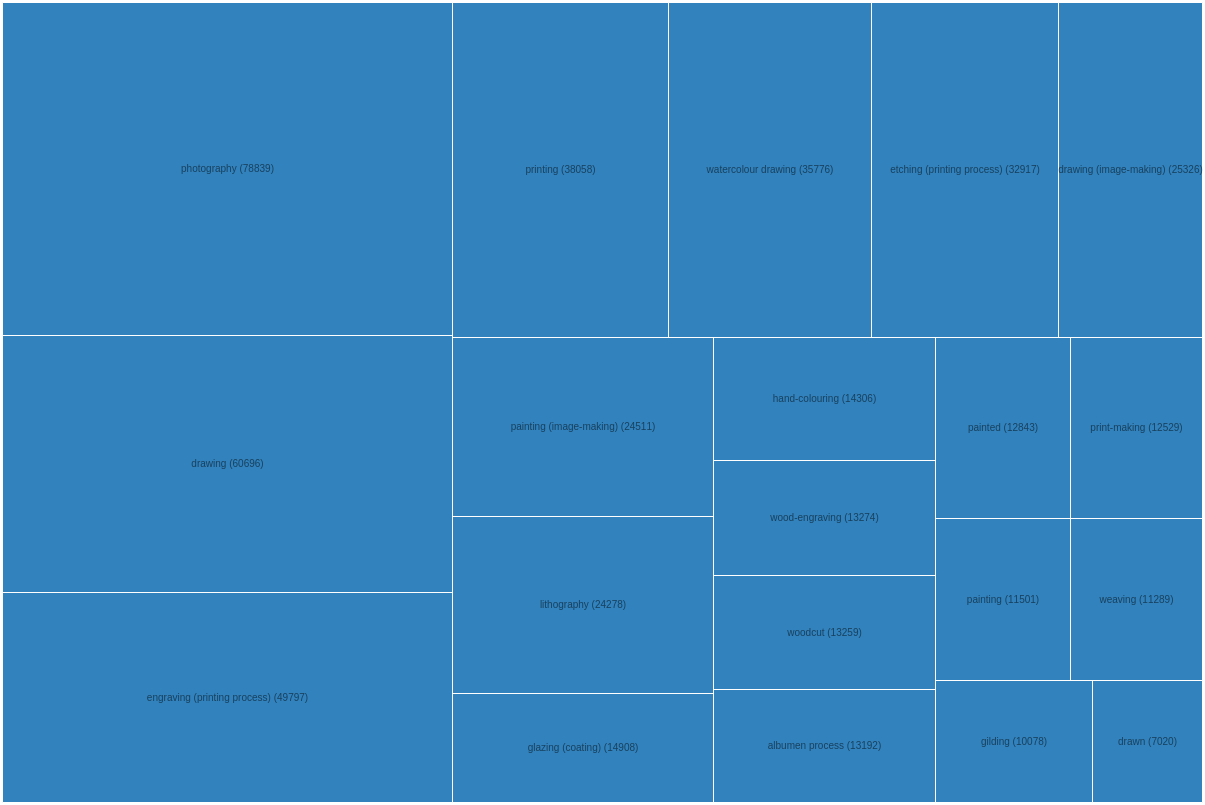

In [16]:
req = requests.get('http://vam-etc-test-api.azureedge.net/api/v2/objects/clusters/search?cluster_type=technique')

object_data = req.json()
object_info = object_data["info"]
object_clusters = object_data["clusters"]
materials = object_clusters["techniques"]["terms"]
treemap(materials, "Techniques")

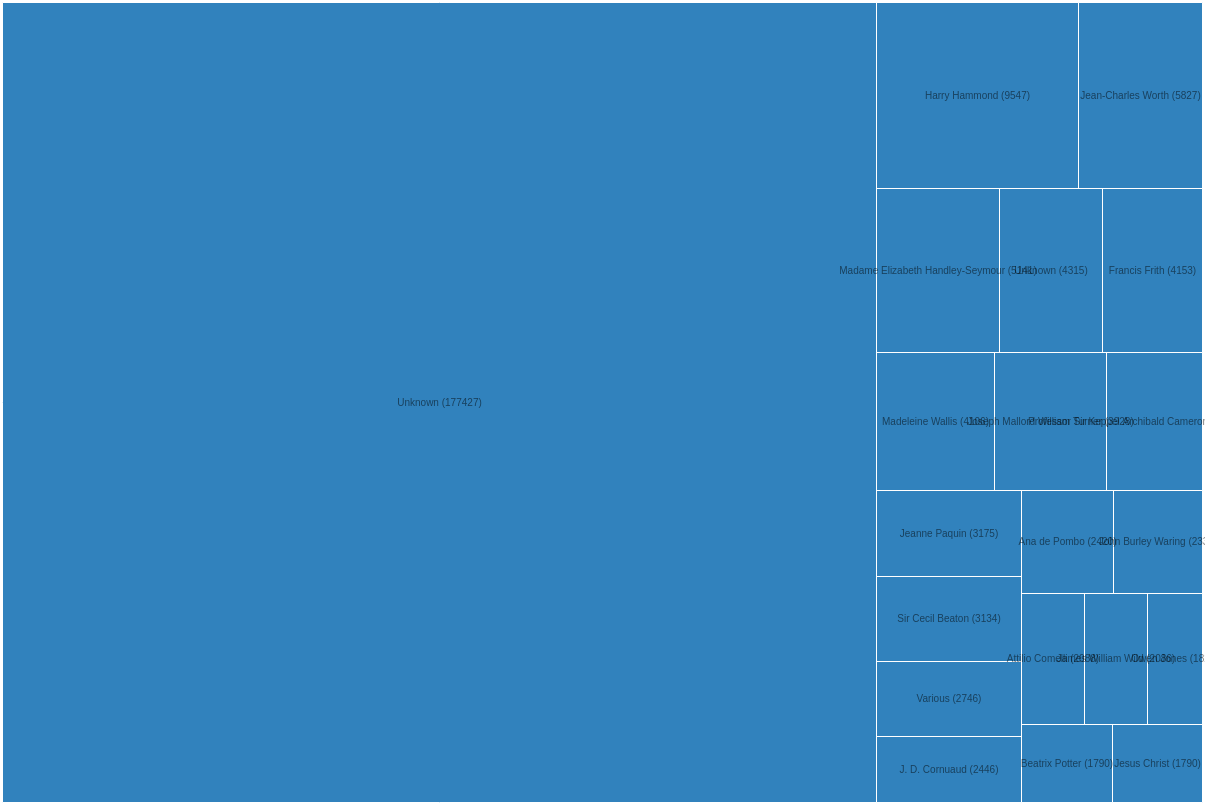

In [17]:
req = requests.get('http://vam-etc-test-api.azureedge.net/api/v2/objects/clusters/search?cluster_type=person')

object_data = req.json()
object_info = object_data["info"]
object_clusters = object_data["clusters"]
materials = object_clusters["persons"]["terms"]
treemap(materials, "Persons")

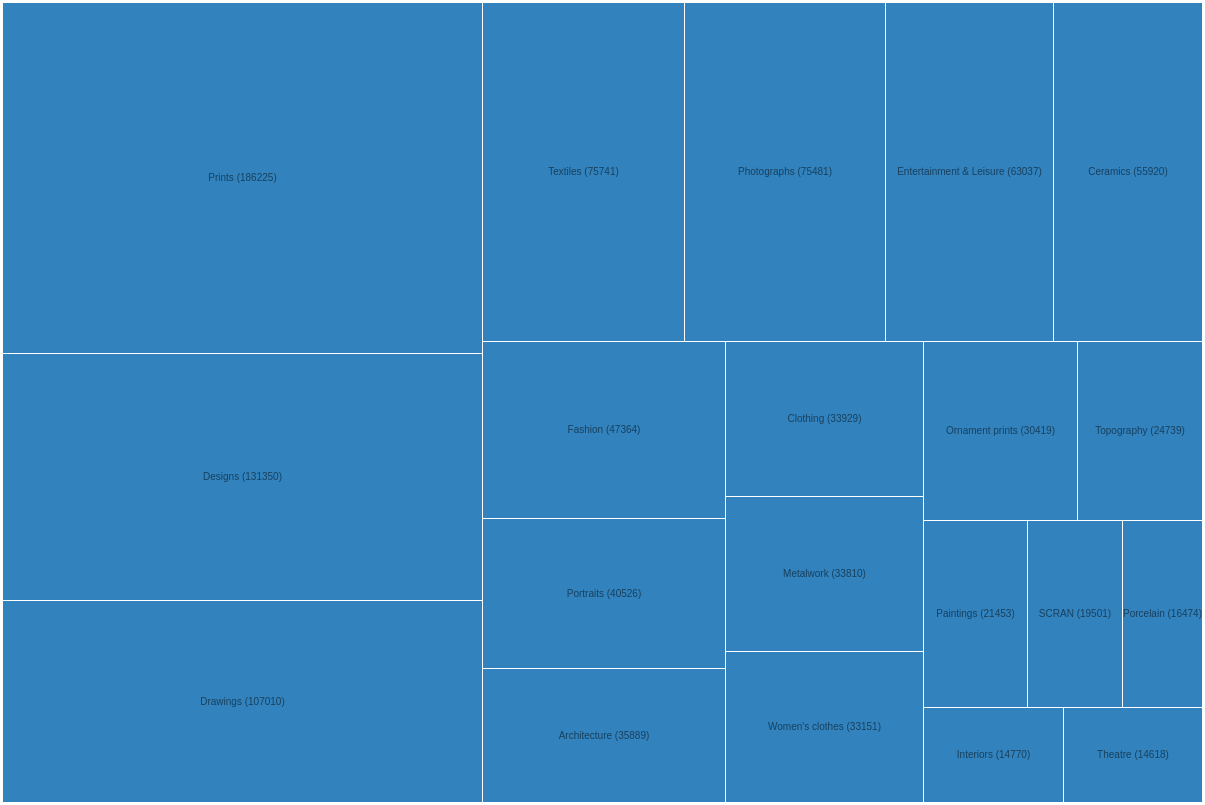

In [21]:
req = requests.get('http://vam-etc-test-api.azureedge.net/api/v2/objects/clusters/search?cluster_type=category')

object_data = req.json()
object_info = object_data["info"]
object_clusters = object_data["clusters"]
materials = object_clusters["categories"]["terms"]
treemap(materials, "Categories")

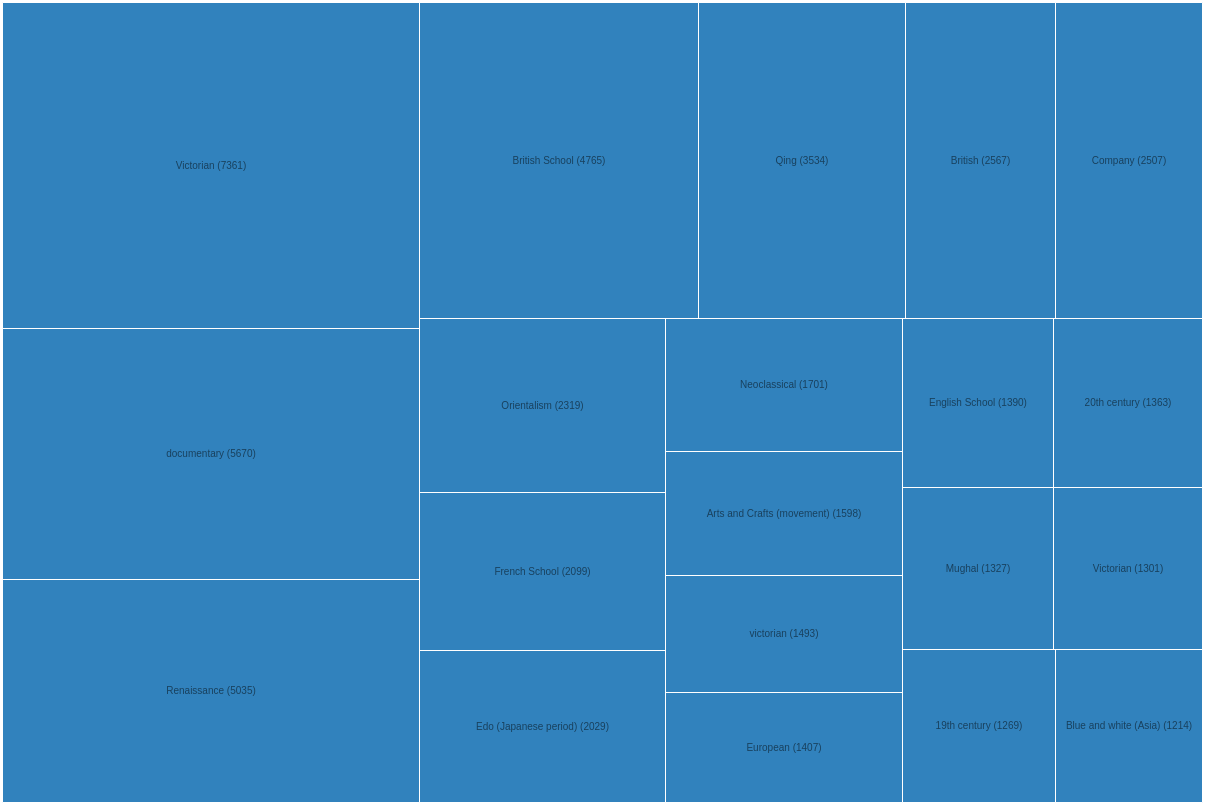

In [22]:
req = requests.get('http://vam-etc-test-api.azureedge.net/api/v2/objects/clusters/search?cluster_type=style')

object_data = req.json()
object_info = object_data["info"]
object_clusters = object_data["clusters"]
materials = object_clusters["styles"]["terms"]
treemap(materials, "Styles")

In [ ]:
# Search within a cluster ?